<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/main/MallExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the part 2 of Practice 8 Clustering Algorithms
Subject:
Pattern Recognition

Instructions:
1. Download Mall_Custormers.csv
2. Create a market segmentation using some clustering algorithm
3. Calculate the silhouette score, find the best model that makes a good partition
4. Using the partitions found, describe the clustering using desscriptive stadistic.
5. Upload your work in PDF

1. Import the necesary libraries

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score

2. Import the dataframe

In [133]:
!wget -nc https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/Mall_Customers.csv


File ‘Mall_Customers.csv’ already there; not retrieving.



In [134]:
data = pd.read_csv("Mall_Customers.csv")

In [135]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Preprocessing
I will preprocess the dataframe in the following way:
- Eliminate the ID
- Eliminate the gender column

In [136]:
df = data.drop(columns=['CustomerID'])

In [137]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Encoding Gender


In [141]:
data = df.drop(columns=['Gender'])

In [142]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [143]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [144]:
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

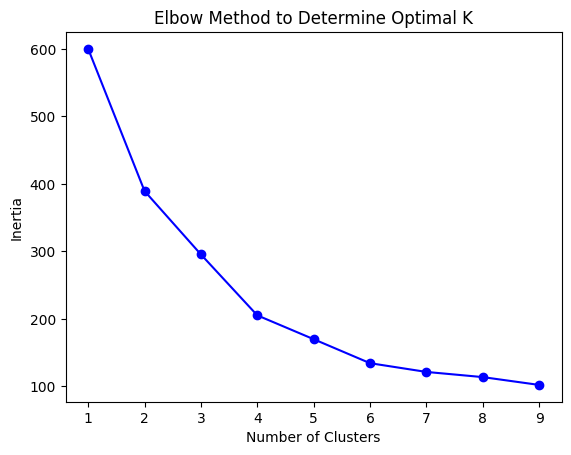

In [145]:
# Elbow method to determine how many clusters can I use
# I took these code example from https://www.w3schools.com/python/python_ml_k-means.asp
inertia = []
K = range(1, 10) # the number of clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42) # here in the class the teacher explained, using random_state is not machine lear
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

After the elbow method implementation I think the number of clusters that I can use could be:
* 2 clusters  
* 3 clusters
* 4 clusters

Because the inertia in each iterarion is 100, so I Would like to test with these clusters.


# 2 Clusters

In [146]:
# Training K means with two clusters
kmeans = KMeans(n_clusters=2, random_state=42) # using the random state just for this practice
kmeans.fit(scaled_data)


KMeans(n_clusters=2, random_state=42)

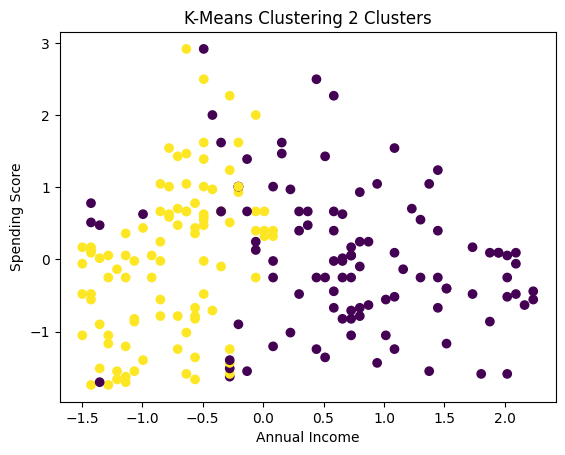

In [147]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering 2 Clusters')
plt.show()

In [148]:
silhouette_avg2_Clusters = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score for 2 clusters: {silhouette_avg2_Clusters}")


Silhouette Score for 2 clusters: 0.33547192894004574


# 3 Clusters


In [149]:
# Training K means with three clusters
kmeans = KMeans(n_clusters=3, random_state=42) # using the random state just for this practice
kmeans.fit(scaled_data)


KMeans(n_clusters=3, random_state=42)

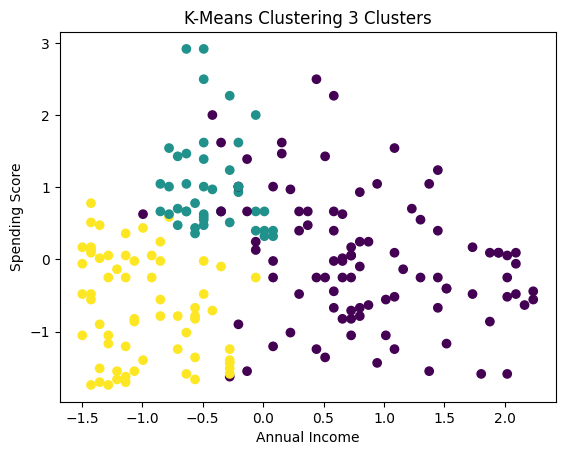

In [150]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering 3 Clusters')
plt.show()

In [151]:
silhouette_avg3_Clusters = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score for 3 clusters: {silhouette_avg3_Clusters}")

Silhouette Score for 3 clusters: 0.3579234303882264


# 4 Cluster

In [152]:
# Training K means with three clusters
kmeans = KMeans(n_clusters=4, random_state=42) # using the random state just for this practice
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

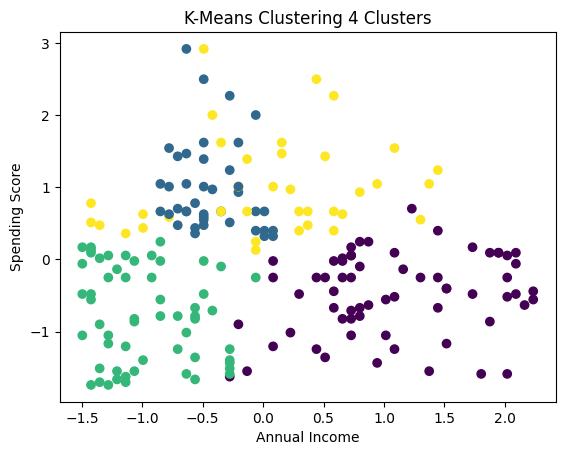

In [153]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering 4 Clusters')
plt.show()

In [154]:
silhouette_avg4_Clusters = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score for 4 clusters: {silhouette_avg4_Clusters}")

Silhouette Score for 4 clusters: 0.4039582785148566


# Silhouette score
If we review the theory:
The silhouette_score function takes the scaled data and the cluster labels as inpunt and returns the average silhouette score for all samples.

Interpretation:


*   Close to 1: Indicates that the samples are well clustered
*   Close to 0: Indicates overlapping clusters
*   Negative values: Indicates that the samples might have been asigned to the wrong cluster.

After this, I can conclude, the best Kmeans configuration is with 4 clusters.





# Stadistics

In [155]:
# For this part I used as reference the following web page: https://www.statology.org/k-means-clustering-in-python/
# I added the cluster because with these new attribute I can group by The cluster
data['Cluster'] = kmeans.labels_


In [156]:
data

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,2
3,23,16,77,2
4,31,17,40,2
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [157]:
data.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster'], dtype='object')

In [159]:
cluster_description = data.groupby('Cluster').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max']
})

In [161]:
cluster_description

Age                    Annual Income (k$)                      \
              mean        std min max               mean        std min  max   
Cluster                                                                        
0        53.984615   9.418221  35  70          47.707692  14.648723  18   79   
1        32.875000   3.857643  27  40          86.100000  16.339036  69  137   
2        25.438596   5.707193  18  38          40.000000  17.031483  15   67   
3        39.368421  10.617225  19  59          86.500000  16.761845  64  137   

        Spending Score (1-100)                     
                          mean        std min max  
Cluster                                            
0                    39.969231  16.405953   3  60  
1                    81.525000   9.999968  58  97  
2                    60.298246  18.434212   6  99  
3                    19.578947  11.684204   1  42

The table give us the following information:
## Cluster 0:

Age:
Ages from 35 to 70 years. The average age is approximately 54 years, so its a mature people.

Annual Income:
The anual income goes from $18k to $79k. The average income is $47.71k.

Spending Score:

The spending score is the second lowest.
## Cluster 1:

Age:
Ages from 27 to 40 years.

Annual Income:
The anual income goes from $69k to $137k. The averages income is $86.10k

Spending Score:
The spending score is highest 81.53, so the people in these cluster maybe is buying a house or a car in my opinion.
### Cluster 2:

Age:
Ages from 18 to 38 years. Young adults like me.

Annual Income:
The income level is lower (like me :[ ), with an average of $40.00k.

Spending Score:

The spending score is moderate, with an average of about 60.30.
### Cluster 3:

Age:
Its a mix, with ages ranging from 19 to 59 years.
Annual Income:
The income level is like Cluster 1, with an average of $86.50k

Spending Score:
Is low, with an average of about 19.58, using the ages I assume this people is saving their money.
